In [1]:
from preprocess_text import preprocess_text

In [3]:
import pandas as pd

def preprocess_and_save(input_file, output_file):
    # Function to preprocess text from input_file
    # Assuming preprocess_text() is defined elsewhere
    df = preprocess_text(input_file)
    
    # Save processed data to CSV
    df.to_csv(output_file, index=False)
    
    print(f"Lyrics have been saved to '{output_file}'")

# Example usage:
input_file = './Lyrical_Verses/Enumerated_GreenEggsAndHam.txt'
output_file = './Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv'

preprocess_and_save(input_file, output_file)


Lyrics have been saved to './Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv'


In [4]:
df = pd.read_csv('./Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv')
df

,Work Title,Subdivision Title,Line
0,green eggs and ham by doctor seuss,stanza 1,i am sam i am sam sam i am
1,green eggs and ham by doctor seuss,stanza 2,that samiam that samiam i do not like that samiam
2,green eggs and ham by doctor seuss,stanza 3,do would you like green eggs and ham
3,green eggs and ham by doctor seuss,stanza 4,i do not like themsamiam
4,green eggs and ham by doctor seuss,stanza 4,i do not like green eggs and ham
...,...,...,...
99,green eggs and ham by doctor seuss,stanza 30,and i will eat them with a mouse
100,green eggs and ham by doctor seuss,stanza 30,and i will eat them here and there
101,green eggs and ham by doctor seuss,stanza 30,say i will eat them anywhere
102,green eggs and ham by doctor seuss,stanza 30,i do so like green eggs and ham


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_text(dataframe):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(dataframe['Line'])
    return tfidf_matrix, vectorizer

tfidf_matrix, vectorizer = vectorize_text(df)


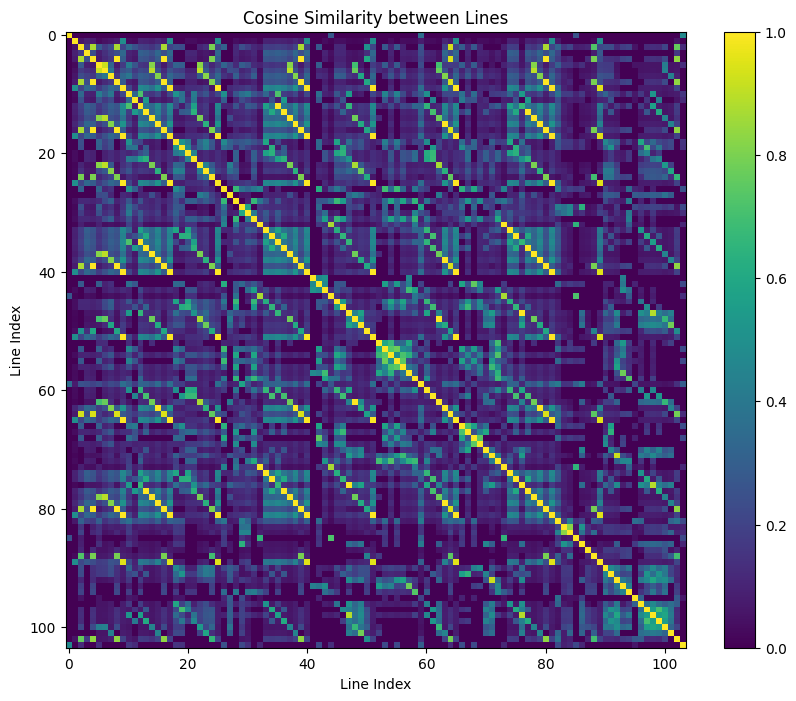

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def visualize_similarity(tfidf_matrix):
    cosine_sim = cosine_similarity(tfidf_matrix)
    plt.figure(figsize=(10, 8))
    plt.imshow(cosine_sim, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('Cosine Similarity between Lines')
    plt.xlabel('Line Index')
    plt.ylabel('Line Index')
    plt.show()

visualize_similarity(tfidf_matrix)


In [7]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained model tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize input text
input_ids = []
for line in df['Line']:
    encoded_line = tokenizer.encode(line, add_special_tokens=True)
    input_ids.append(encoded_line)

# Pad sequences to ensure uniform length
input_ids = torch.tensor([x + [0]*(max(map(len, input_ids))-len(x)) for x in input_ids])

# Load pre-trained model
model = BertModel.from_pretrained('bert-base-uncased')

# Generate embeddings
with torch.no_grad():
    outputs = model(input_ids)
    embeddings = outputs.last_hidden_state.mean(dim=1)


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


In [8]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings)


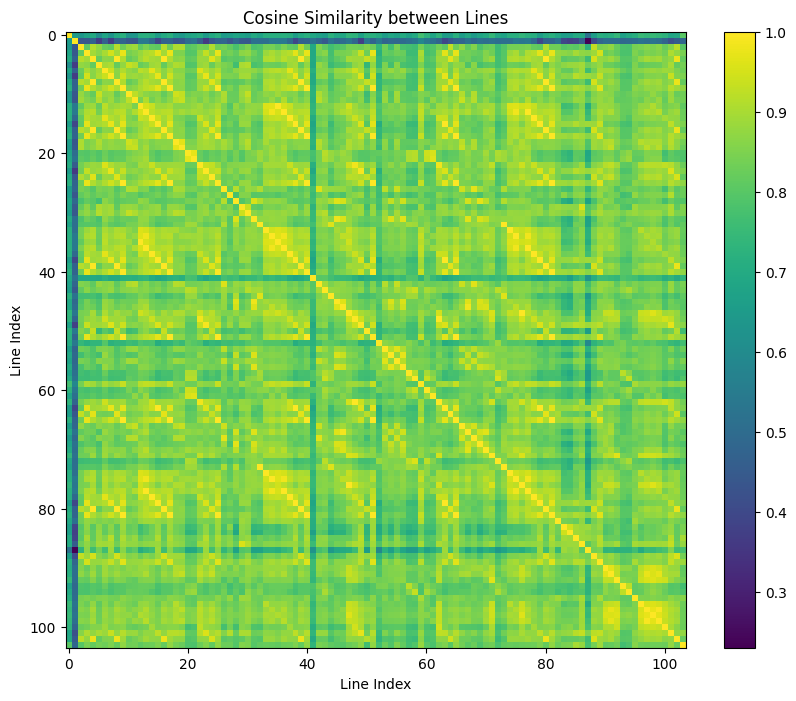

In [9]:
import matplotlib.pyplot as plt

def visualize_similarity(cosine_sim):
    plt.figure(figsize=(10, 8))
    plt.imshow(cosine_sim, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('Cosine Similarity between Lines')
    plt.xlabel('Line Index')
    plt.ylabel('Line Index')
    plt.show()

visualize_similarity(cosine_sim)


In [10]:
import numpy as np

def compute_fractal_dimension(cosine_sim, threshold=0.5):
    points = np.argwhere(cosine_sim > threshold)
    distances = np.sqrt((points[:, 0] - points[:, 1])**2)
    radii = np.linspace(1, distances.max(), 50)
    mass = [np.sum(distances < r) for r in radii]
    
    log_radii = np.log(radii)
    log_mass = np.log(mass)
    
    slope, _ = np.polyfit(log_radii, log_mass, 1)
    fractal_dimension = slope
    return fractal_dimension

fractal_dimension = compute_fractal_dimension(cosine_sim)
print(f"Fractal Dimension: {fractal_dimension}")


Fractal Dimension: 0.8680447745256871
